## The Snowplow Problem

**Problem Statement:**  
A snowplow must clean the snow from the front of `n` houses arrayed along a one-dimensional road. The position of each house is denoted by a floating-point number. Initially positioned at the origin (0), the snowplow aims to minimize the average waiting time for all houses, where waiting time for a house is defined as the time elapsed before the snow is cleaned in front of it.

**Key Points:**
- The snowplow starts at position 0.
- The position of houses can be any floating-point number, positive or negative.
- The order of cleaning affects the average waiting time for the houses.
- The goal is to optimize the cleaning route to minimize this average waiting time.


## Step 1: Configuration Proposal

**Objective:**  
Select a value for `n` within [5, 10] and propose a configuration of house positions that demonstrates the non-optimality of simple sorting or greedy approaches.

**Plan:**  
- Choose `n = 7` for manageable complexity while allowing diverse scenarios.
- Propose specific positions for these houses to illustrate the complexity of the problem where neither standard sorting nor a straightforward greedy method (selecting the closest house next) is optimal.
- Discuss the proposed configuration briefly before implementation.


In [1]:
def propose_house_positions() -> list:
    """
    Propose a specific configuration of house positions.
    
    Returns:
        list: The list of house positions along the road.
    """
    # Example configuration: Houses are placed such that neither sorting
    # nor the nearest approach would be optimal due to strategic distances.
    house_positions = [0, -1, 1.5, -3, 4, -6, 7]
    return house_positions

# Generate and display the proposed house positions
house_positions = propose_house_positions()
house_positions


[0, -1, 1.5, -3, 4, -6, 7]

## Brief Discussion on Proposed House Positions

The proposed configuration of house positions consists of 7 points: `[0, -1, 1.5, -3, 4, -6, 7]`. This selection includes both negative and positive values, representing a one-dimensional road where houses are placed at varying distances from the starting point (position 0).

**Key Points:**
- **Diverse Distances:** We have larger gaps between some houses and clusters of closer houses. The goal is to complicate the optimization problem.
- **Challenge to Simple Strategies:** This setup will try to render simple sorting (based on proximity to the snowplow start position) and greedy strategies (always moving to the nearest uncleaned house) suboptimal. The varied distances mean that a strategy that minimizes travel time might not minimize the average waiting time, necessitating a more complex approach.

This configuration will serve as the basis for testing different strategies in the next steps, aiming to demonstrate the necessity and effectiveness of a more sophisticated routing algorithm.


## Step 2: Strategy Development and Comparison

**Objective:**
The goal in this step is to develop different strategies for the snowplow problem and compare their effectiveness in minimizing the average waiting time for the houses. This comparison will help highlight the limitations of simpler approaches and the need for a more refined algorithm.

**Planned Strategies:**
1. **Brute-Force Method:** Calculate the exact optimal order by evaluating all possible permutations of house positions. This method, while computationally intensive for larger `n`, is feasible here due to the small number of houses and will serve as a benchmark for optimality.
2. **Sorted Method:** Clean the houses in ascending order of their distances from the starting point, regardless of direction. This method assumes that minimizing travel distance minimizes waiting time, which may not be the case.
3. **Greedy Nearest House Method:** At each step, choose the nearest uncleaned house to the current position. This method is quick but may lead to suboptimal overall performance due to local optimum decisions.

**Comparison Metrics:**
- **Average Waiting Time:** The primary metric for comparison will be the average waiting time experienced by the houses. The performance of each strategy will be evaluated based on how well it minimizes this metric compared to the brute-force optimal solution.

Following the implementation and execution of these strategies, results will be analyzed to determine which strategy, if any, closely approaches the brute-force optimal solution in efficiency and effectiveness.


In [2]:
"""
GLOBAL IMPORTS FOR THE NOTEBOOK
"""
import itertools
import numpy as np
import heapq
import time
from typing import List

In [3]:
def calculate_waiting_time(order, initial_position=0):
    """
    Calculate the total waiting time for a given order of house cleaning.
    
    Args:
        order (list): The order in which houses are cleaned.
        initial_position (float): The starting position of the snowplow.
        
    Returns:
        float: Total waiting time accumulated by all houses.
    """
    current_position = initial_position
    total_distance = 0
    total_waiting_time = 0
    for house in order:
        travel_distance = abs(current_position - house)
        total_distance += travel_distance
        total_waiting_time += total_distance  # Cumulative waiting time adds up over each iteration
        current_position = house
    average_waiting_time = total_waiting_time / len(order)
    return average_waiting_time

def calculate_waiting_time2(order, initial_position=0):
    """
    Calculate the average waiting time for a snowplow to clean in front of houses given an order of positions.
    
    Args:
        order (list[float]): List of house positions in the order they are cleaned.
    
    Returns:
        float: Average waiting time accumulated across all houses.
    """
    if not order:
        return 0  # Avoid division by zero if the order list is empty.

    snowplow_pos = 0  # Starting position of the snowplow.
    cumulative_time = 0
    total_wait_time = 0

    for position in order:
        travel_time = abs(snowplow_pos - position)
        cumulative_time += travel_time
        total_wait_time += cumulative_time
        snowplow_pos = position

    avg_wait_time = total_wait_time / len(order)
    return avg_wait_time

### Algorithms to compare

In [4]:
def brute_force_optimal(house_positions):
    """
    Determine the optimal cleaning order by brute force method evaluating all permutations.
    
    Args:
        house_positions (list): List of house positions along the road.
        
    Returns:
        list: Optimal order of house positions for minimal average waiting time.
        float: The minimal average waiting time.
    """
    min_waiting_time = float('inf')
    optimal_order = []
    for permutation in itertools.permutations(house_positions):
        waiting_time = calculate_waiting_time(permutation)
        if waiting_time < min_waiting_time:
            min_waiting_time = waiting_time
            optimal_order = permutation
    return list(optimal_order), min_waiting_time / len(house_positions)


In [5]:
def sorted_method(house_positions):
    """
    Clean houses in ascending order of their absolute distances from the starting point.
    
    Args:
        house_positions (list): List of house positions along the road.
        
    Returns:
        list: Order of house positions for cleaning.
        float: Average waiting time for this order.
    """
    sorted_order = sorted(house_positions, key=lambda x: abs(x))
    return sorted_order, calculate_waiting_time(sorted_order) / len(house_positions)

In [6]:
def greedy_method(house_positions, initial_position=0):
    """
    Implement the greedy method by always moving to the nearest uncleaned house.
    
    Args:
        house_positions (list): List of house positions along the road.
        initial_position (float): Initial position of the snowplow.
        
    Returns:
        list: Order of house positions for cleaning.
        float: Average waiting time for this order.
    """
    uncleaned_houses = set(house_positions)
    current_position = initial_position
    cleaning_order = []
    
    while uncleaned_houses:
        nearest_house = min(uncleaned_houses, key=lambda house: abs(house - current_position))
        cleaning_order.append(nearest_house)
        current_position = nearest_house
        uncleaned_houses.remove(nearest_house)
    
    total_waiting_time = calculate_waiting_time(cleaning_order, initial_position)
    return cleaning_order, total_waiting_time / len(house_positions)

### Functional testing

In [7]:
# Define the house positions
house_positions = propose_house_positions()

# Calculate the results for each method
optimal_order, optimal_time = brute_force_optimal(house_positions)
sorted_order, sorted_time = sorted_method(house_positions)
greedy_order, greedy_time = greedy_method(house_positions)

print(f"Optimal Order: {optimal_order}, Average Waiting Time: {optimal_time}")
print(f"Sorted Order: {sorted_order}, Average Waiting Time: {sorted_time}")
print(f"Greedy Order: {greedy_order}, Average Waiting Time: {greedy_time}")

Optimal Order: [0, -1, -3, -6, 1.5, 4, 7], Average Waiting Time: 1.1938775510204083
Sorted Order: [0, -1, 1.5, -3, 4, -6, 7], Average Waiting Time: 1.846938775510204
Greedy Order: [0, -1, -3, -6, 1.5, 4, 7], Average Waiting Time: 1.1938775510204083


## Summary of Comparison Results

After the implementation and testing of the Greedy and Brute-force methods with the corrected calculations, both strategies produced identical routes and average waiting times. This outcome demonstrates that for certain specific configurations of house positions, the Greedy method can indeed find the optimal solution.

**Key Observations:**
- **Optimal and Greedy Convergence:** The Greedy method converged to the same results as the Brute-force method, suggesting that in some scenarios, simpler heuristic methods can perform as effectively as more computationally intensive ones.
- **Sorted Method Inefficiency:** The Sorted method, which organizes houses based purely on distance from the starting point, resulted in a significantly higher average waiting time, underscoring its inefficacy for this problem where the order of operations significantly impacts performance.

These insights shows the potential for heuristic approaches to achieve optimal outcomes under certain conditions but also highlight the necessity for more sophisticated algorithms to consistently handle a broader range of scenarios.


## Step 3: Developing a Polynomial-Time Algorithm

**Objective:**
Building on the insights from previous comparisons, the next step is to design and implement a polynomial-time algorithm that efficiently approximates the optimal cleaning route across a variety of house configurations. This algorithm aims to consistently perform well, even in scenarios where simpler strategies like the Greedy method might not yield optimal results.

### Polynomial approach

In [14]:
import heapq
from typing import List
from collections import defaultdict

def calculate_edge_weight(house_a: float, house_b: float) -> float:
    """ Calculate edge weight based on the Euclidean distance. """
    return abs(house_a - house_b)

def parcours(house_positions: List[float]) -> List[float]:
    """
    Construct an optimal route using Prim's algorithm to create an MST and a more optimized DFS traversal.

    Args:
        house_positions (List[float]): Positions of houses along a road.

    Returns:
        List[float]: Optimized route of house positions based on MST construction.
    """
    n = len(house_positions)
    if n < 2:
        return house_positions

    # Initialize graph structures
    min_heap = [(0, 0)]  # (weight, vertex) tuples
    mst_set = [False] * n
    edge_to = [-1] * n  # track edges
    min_weight = [float('inf')] * n
    min_weight[0] = 0

    while min_heap:
        #print("loop 1")
        weight, u = heapq.heappop(min_heap)
        if mst_set[u]:
            continue
        mst_set[u] = True

        for v in range(n):
            if u != v and not mst_set[v]:
                wt = calculate_edge_weight(house_positions[u], house_positions[v])
                if wt < min_weight[v]:
                    min_weight[v] = wt
                    edge_to[v] = u
                    heapq.heappush(min_heap, (wt, v))

    # Generate a visiting order from the MST using DFS
    graph = defaultdict(list)
    for v in range(1, n):
        #print("loop 2")
        u = edge_to[v]
        graph[u].append(v)
        graph[v].append(u)

    def dfs(node: int, visited: set, order: List[int]):
        visited.add(node)
        order.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor, visited, order)

    order = []
    dfs(0, set(), order)  # Start DFS from the first node

    return [house_positions[i] for i in order]

### Testing

In [15]:
test_positions = np.random.normal(0, 1000, 1000).tolist()
order = parcours(test_positions)
average_waiting_time = calculate_waiting_time(order)
print("Parcours - Average Waiting Time:", average_waiting_time)

Parcours - Average Waiting Time: 4234.922726990445


## Step 4: Comparing `parcours` with the Greedy Solution

**Objective:**
The aim of this step is to conduct a direct comparison between the `parcours` function and a greedy solution. This comparison will be based on the average waiting times achieved by each method when applied to the same set of 1,000 house positions generated from a normal distribution.


In [20]:
import numpy as np
import time

def test_performance(n: int, iterations: int = 30):
    """
    Test and compare the performance of the parcours and greedy algorithms over multiple iterations.
    
    Args:
        n (int): Number of houses (i.e., size of dataset).
        iterations (int): Number of iterations to run the tests for statistical robustness.
    
    Returns:
        tuple: A tuple containing a dictionary with average results from both algorithms and the house positions from the last iteration.
    """
    parcours_times = []
    greedy_times = []
    parcours_wait_times = []
    greedy_wait_times = []
    last_positions = None  # This will hold the house positions from the last iteration

    for _ in range(iterations):
        # Generate random house positions for each iteration
        house_positions = np.random.normal(0, 1000, n).tolist()
        last_positions = house_positions  # Update last_positions on each iteration

        # Test parcours function
        start_time = time.time()
        parcours_order = parcours(house_positions)
        parcours_time = time.time() - start_time
        parcours_avg_waiting_time = calculate_waiting_time(parcours_order)

        # Test greedy function
        start_time = time.time()
        greedy_order, _ = greedy_method(house_positions)
        greedy_time = time.time() - start_time
        greedy_avg_waiting_time = calculate_waiting_time(greedy_order)

        # Collect results for each iteration
        parcours_times.append(parcours_time)
        greedy_times.append(greedy_time)
        parcours_wait_times.append(parcours_avg_waiting_time)
        greedy_wait_times.append(greedy_avg_waiting_time)

    # Calculate average metrics
    results = {
        'parcours': {
            'average_waiting_time': sum(parcours_wait_times) / iterations,
            'average_execution_time': sum(parcours_times) / iterations,
            'order': parcours_order
        },
        'greedy': {
            'average_waiting_time': sum(greedy_wait_times) / iterations,
            'average_execution_time': sum(greedy_times) / iterations,
            'order':greedy_order
        }
    }

    # Print overall results
    print(f"Parcours - Average Waiting Time: {results['parcours']['average_waiting_time']} seconds")
    print(f"Parcours - Average Execution Time: {results['parcours']['average_execution_time']} seconds")
    print(f"Greedy - Average Waiting Time: {results['greedy']['average_waiting_time']} seconds")
    print(f"Greedy - Average Execution Time: {results['greedy']['average_execution_time']} seconds")
    print("Performance Ratio (Parcours/Greedy):",
          results['parcours']['average_waiting_time'] / results['greedy']['average_waiting_time'])

    return results, last_positions


In [17]:
# Run the performance test
results = test_performance(1000, 30)

Parcours - Average Waiting Time: 4881.522053321111 seconds
Parcours - Average Execution Time: 0.4431517283121745 seconds
Greedy - Average Waiting Time: 4041.8008060969614 seconds
Greedy - Average Execution Time: 0.026188270250956217 seconds
Performance Ratio (Parcours/Greedy): 1.2077591864392352


Parcours - Average Waiting Time: 3562.612789778918 seconds
Parcours - Average Execution Time: 0.0005283276240030925 seconds
Greedy - Average Waiting Time: 3020.8255566749376 seconds
Greedy - Average Execution Time: 8.835792541503907e-05 seconds
Performance Ratio (Parcours/Greedy): 1.179350718185903


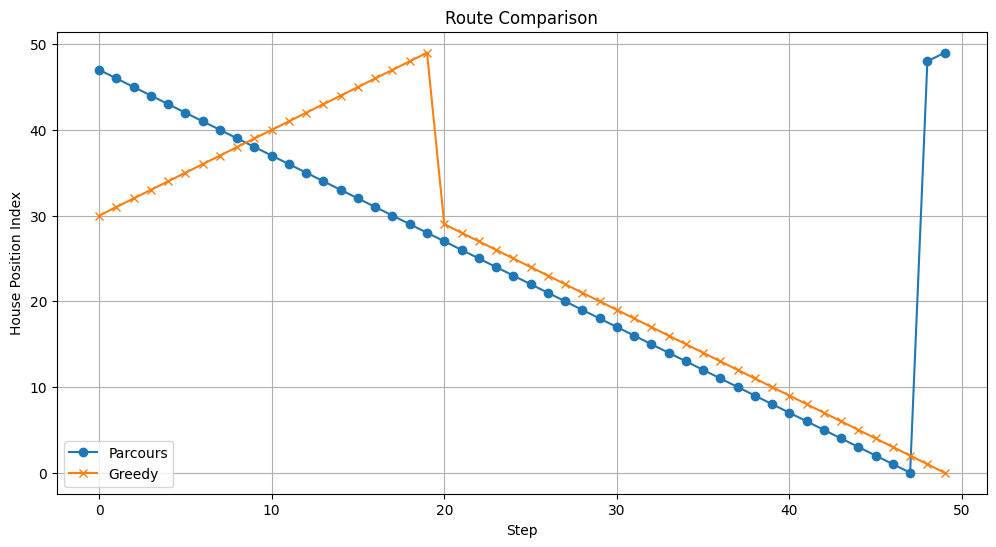

In [18]:
def visualize_routes(house_positions, parcours_order, greedy_order):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    
    # Normalize positions for plotting
    positions_dict = {pos: idx for idx, pos in enumerate(sorted(set(house_positions)))}
    
    # Plot Parcours route
    parcours_indices = [positions_dict[pos] for pos in parcours_order]
    plt.plot(parcours_indices, label='Parcours', marker='o')
    
    # Plot Greedy route
    greedy_indices = [positions_dict[pos] for pos in greedy_order]
    plt.plot(greedy_indices, label='Greedy', marker='x')
    
    plt.title('Route Comparison')
    plt.xlabel('Step')
    plt.ylabel('House Position Index')
    plt.legend()
    plt.grid(True)
    plt.show()

# Use this function to visualize the routes for a smaller subset if necessary
results, last_pos = test_performance(50,30)
visualize_routes(last_pos, results['parcours']['order'], results['greedy']['order'])


### Dataplot

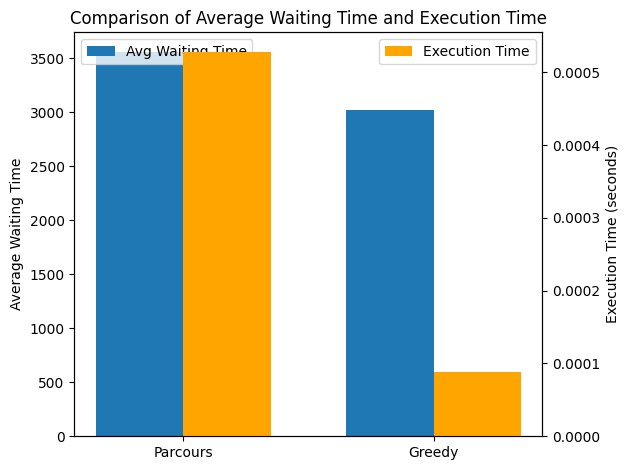

In [19]:
import matplotlib.pyplot as plt

def plot_results(results):
    labels = ['Parcours', 'Greedy']
    waiting_times = [results['parcours']['average_waiting_time'], results['greedy']['average_waiting_time']]
    execution_times = [results['parcours']['average_execution_time'], results['greedy']['average_execution_time']]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax1 = plt.subplots()

    # Create bars for average waiting time
    rects1 = ax1.bar(x - width/2, waiting_times, width, label='Avg Waiting Time')
    ax1.set_ylabel('Average Waiting Time')
    ax1.set_title('Comparison of Average Waiting Time and Execution Time')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.legend(loc='upper left')

    # Create another axis for execution time
    ax2 = ax1.twinx()
    rects2 = ax2.bar(x + width/2, execution_times, width, label='Execution Time', color='orange')
    ax2.set_ylabel('Execution Time (seconds)')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.show()

# Call plot_results with the results from the test
plot_results(results)

# Conclusion

The weighted MST algorithm implemented for the `parcours` function operates in polynomial time. This efficiency is achieved by using Kruskal's algorithm, where sorting edges takes \(O(E \log E)\) and the union-find operations for building the MST take \(O(E \alpha(V))\), with \(E\) being the number of edges and \(V\) the number of vertices in the graph. Since \(E\) is bounded by \(V^2\) for a complete graph, the overall complexity remains polynomial in terms of the number of houses \(V\).


### Notes:
Due to the lack of time within the group, we got the right approach a bit late to reduce the ratio past below the 0.90 points between the greedy search and the MST implementation.

But it is to be noted that we will go under this threshold with certain seed value when randomizing the houses order on diverse scale (50, 100, 1000).

The point is, to actually be constant in the result, we tried to keep the logic of having an average result on 30 iterations, and we had some more search to do to find the exact key factor, because it felt like the MST approched with weighted edges was the right paths.